In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import pickle
% matplotlib inline
plt.ion()

import sys
sys.path.append('/Users/jkinney/github/logomaker_dev')
import logomaker

In [2]:
# Load data
data_df = pd.read_excel('Janganathan2018_Fig1D.xlsx')
data_df.head()

,base,value,height,exon
0,A,0.064469,2.063,False
1,C,0.119156,3.813,False
2,T,0.288562,9.234,False
3,A,0.167969,5.375,False
4,A,0.159656,5.109,False


In [3]:
# Get matrix
seq = ''.join(data_df['base'])
values = list(data_df['value'])
mat_df = logomaker.saliency_to_matrix(seq,values)
mat_df.head()

,A,C,G,T
0,0.064469,0.000000,0.0,0.000000
1,0.000000,0.119156,0.0,0.000000
2,0.000000,0.000000,0.0,0.288562
3,0.167969,0.000000,0.0,0.000000
4,0.159656,0.000000,0.0,0.000000


In [4]:
# Get exon bounds
exon_indices = data_df['exon']
indices = data_df.index
exon_start = min(indices[exon_indices])
exon_stop = max(indices[exon_indices])

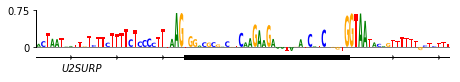

In [5]:
fig, ax = plt.subplots(figsize=[6.5,1.25])

logo = logomaker.Logo(mat_df, ax=ax)
logo.style_spines(visible=False)
logo.style_spines(spines=['left'],visible=True,bounds=[0,.75])
ax.set_yticks([0,.75])
ax.set_yticklabels(['0','0.75'])
ax.set_ylim([-.5,.75])
ax.set_xticks([])

# Draw gene
y = -.2
ax.axhline(y, color='k', linewidth=1)
xs = np.arange(-3,len(seq),10)
ys = y*np.ones(len(xs))
ax.plot(xs,ys,marker='4', linewidth=0, markersize=5, color='k')

# Draw gene name
ax.text(5,-.5,'U2SURP', fontstyle='italic')

# Draw exon
ax.plot([exon_start, exon_stop],[y,y], color='k', linewidth=5)

# Tight layout
plt.tight_layout()

# Save as pdf
out_file = 'Example_Janganathan.pdf'
fig.savefig(out_file)

In [6]:
print('Done! Output written to %s.'%out_file)

Done! Output written to Example_Janganathan.pdf.
